## Consultantcy Fees Prediction
Dataset Link: https://www.kaggle.com/datasets/nitin194/doctor-fees-prediction

- Qualification: Qualification and degrees held by the doctor
- Experience: Experience of the doctor (number of years)
- Rating: Rating given by patients
- Profile: Type of the doctor
- Miscellaeous_Info: Extra information about the doctor
- Place: Area and the city where the doctor is located
- Fees: Fees charged by the doctor(Target)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [3]:
train.sample(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
4029,BDS,11 years experience,96%,"R.S. Puram, Coimbatore",Dentist,"96% 98 Feedback R.S. Puram, Coimbatore",200
1131,BHMS,10 years experience,NaN,"Mahim, Mumbai",Homeopath,NaN,100
1774,"BHMS, MD - Homeopathy",8 years experience,NaN,"Pitampura, Delhi",Homeopath,NaN,250
4353,"MBBS, MS - ENT",44 years experience,NaN,"Karol Bagh, Delhi",ENT Specialist,NaN,650
2221,"MBBS, MD - General Medicine, MRCP (UK), FRCP",42 years experience,NaN,"Defence Colony, Delhi",General Medicine,NaN,100
4934,BAMS,12 years experience,95%,"Rohini, Delhi",Ayurveda,"95% 10 Feedback Rohini, Delhi",400
906,"MBBS, MS - ENT",12 years experience,91%,"Nizampet, Hyderabad",ENT Specialist,"91% 11 Feedback Nizampet, Hyderabad",300
2237,"MBBS, MD - Dermatology",9 years experience,91%,"Vignan Nagar, Bangalore",Dermatologists,"91% 51 Feedback Vignan Nagar, Bangalore",400
1323,"MBBS, DLO, DNB - ENT",20 years experience,100%,"Vadapalani, Chennai",ENT Specialist,Hearing Deficiency Assessment Tonsillitis Trea...,500
1978,"MBBS, MS - Otorhinolaryngology, DLO",12 years experience,NaN,"OMR Road, Chennai",ENT Specialist,NaN,500


In [4]:
test.sample(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1556,"BHMS, Fellowship in Medical Cosmetology (FMC)",17 years experience,NaN,"Dadar, Mumbai",Homeopath,NaN
1208,MBBS,39 years experience,NaN,"Colaba, Mumbai",General Medicine,NaN
110,BDS,6 years experience,NaN,"Vileparle West, Mumbai",Dentist,"Dental Fillings Vileparle West, Mumbai ₹800"
230,"BDS, Certificate of Oral Implantology",14 years experience,100%,"Okhla, Delhi",Dentist,NaN
283,"MBBS, DNB - General Medicine, Post Graduate Di...",13 years experience,NaN,"Kaudiar, Thiruvananthapuram",General Medicine,NaN
1077,"BDS, MDS - Endodontics",19 years experience,NaN,"Mylapore, Chennai",Dentist,Impaction / Impacted Tooth Extraction BPS Dent...
871,"MBBS, DDVL",16 years experience,NaN,"Nanganallur, Chennai",Dermatologists,NaN
407,MBBS,23 years experience,NaN,"Yelahanka, Bangalore",General Medicine,NaN
1671,DDVL,8 years experience,NaN,"Dadar East, Mumbai",Dermatologists,NaN
1103,"Diploma in Aesthetic Medicine, Certificate in ...",13 years experience,99%,"Vasant Vihar, Delhi",Dermatologists,Aesthetic Dermatology Anti Aging Treatment Las...


In [5]:
train.shape

(5961, 7)

In [6]:
test.shape

(1987, 6)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [9]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [10]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

- As we know that test data is for the testing our model in the last so keep it as it is for now.
- And work with the train dataset.

In [11]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [12]:
train.describe(include = 'object')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,5961,5961,2659,5936,5961,3341
unique,1420,64,51,877,6,2998
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,488,323,684,75,1397,40


In [13]:
train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] =train['Experience'].astype(int)

In [14]:
train.rename(columns={'Experience':'Experience (in years)'}, inplace=True)

In [15]:
train.head()

,Qualification,Experience (in years),Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [16]:
train['Place'].fillna('Unknown',inplace=True)

C:\Users\hario\AppData\Local\Temp\ipykernel_15972\3253708543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Place'].fillna('Unknown',inplace=True)


In [17]:
train.isnull().sum()

Qualification               0
Experience (in years)       0
Rating                   3302
Place                       0
Profile                     0
Miscellaneous_Info       2620
Fees                        0
dtype: int64

In [18]:
train['Locality'] = train['Place'].str.split(',').str[0]
train['City'] = train['Place'].str.split(',').str[1]
train.drop('Place', axis = 1, inplace = True)

In [19]:
train.head()

,Qualification,Experience (in years),Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [20]:
train['Rating'] = train['Rating'].fillna('-1%')

In [21]:
train.isnull().sum()

Qualification               0
Experience (in years)       0
Rating                      0
Profile                     0
Miscellaneous_Info       2620
Fees                        0
Locality                    0
City                       26
dtype: int64

In [22]:
train['Rating'].value_counts()

Rating
-1%     3302
100%     684
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
90%       66
92%       66
91%       60
89%       42
88%       41
85%       27
82%       23
86%       21
83%       21
80%       19
77%       16
87%       14
84%       13
79%       13
81%       12
67%       12
76%        9
71%        9
75%        8
73%        8
74%        7
60%        7
78%        6
68%        5
56%        5
69%        4
70%        4
57%        3
72%        3
62%        2
64%        2
55%        2
33%        2
63%        2
36%        1
7%         1
48%        1
40%        1
45%        1
65%        1
47%        1
58%        1
53%        1
Name: count, dtype: int64

In [23]:
# train['Rating'] = train['Rating'].str.slice(stop = -1).astype(int)
train['Rating'] = train['Rating'].str.slice(stop = -1).astype(int)

- There are data is too scattered, so try to comprase it by making bins.

In [24]:
bins = [-1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [i for i in range(11)]

train['Rating'] = pd.cut(train['Rating'], bins = bins, labels = labels,include_lowest = True )


In [25]:
train['Rating'].value_counts().sort_index()

Rating
0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: count, dtype: int64

In [26]:
train.sample(20)

,Qualification,Experience (in years),Rating,Profile,Miscellaneous_Info,Fees,Locality,City
3785,"MBBS, DGO",27,0,General Medicine,NaN,500,Sarita Vihar,Delhi
1821,BDS,21,9,Dentist,Impaction / Impacted Tooth Extraction Conserva...,400,Juhu,Mumbai
4945,MDS - Prosthodontist And Crown Bridge,13,0,Dentist,Crowns and Bridges Fixing Cast Partial Denture...,200,Powai,Mumbai
113,"BDS, P.G Diploma in Aesthetic Dentistry",15,10,Dentist,Artificial Teeth Impaction / Impacted Tooth Ex...,200,Perumbakkam,Chennai
4800,"BDS, MDS - Orthodontics",8,10,Dentist,"100% 59 Feedback R.S. Puram, Coimbatore",150,R.S. Puram,Coimbatore
4073,"MD - Homeopathy, BHMS",18,0,Homeopath,NaN,700,Harlur,Bangalore
5149,"MBBS, Diploma in Otorhinolaryngology (DLO), MC...",22,0,ENT Specialist,NaN,300,Mogappair East,Chennai
2574,"MBBS, MS - Otorhinolaryngology",24,0,ENT Specialist,Nasofriboscopia Nasofibrolaryngoscopy Fracture...,700,Patparganj,Delhi
5042,BDS,4,10,Dentist,Dental Fillings General Dentistry Pulpectomy,300,Gachibowli,Hyderabad
5022,"MBBS, MD - Dermatology, Fellowship in Cosmetic...",16,0,Dermatologists,NaN,100,Pitampura,Delhi


In [27]:
train.columns

Index(['Qualification', 'Experience (in years)', 'Rating', 'Profile',
       'Miscellaneous_Info', 'Fees', 'Locality', 'City'],
      dtype='object')

In [28]:
train['Qualification'].value_counts()

Qualification
BDS                                                                                                                           488
BHMS                                                                                                                          477
BAMS                                                                                                                          471
MBBS                                                                                                                          334
MBBS, MS - ENT                                                                                                                220
                                                                                                                             ... 
MBBS, F.C.I.P                                                                                                                   1
BAMS, PG Diploma in Panchakarma                                             

In [29]:
train['Qualification_counts'] = train['Qualification'].apply(lambda x: len(x.split(',')) )
train['Qualification_counts'].value_counts()

Qualification_counts
2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: count, dtype: int64

In [30]:
# Find the whole detail of the Doctor who hold the 10 degrees
train[train['Qualification_counts']==10]

,Qualification,Experience (in years),Rating,Profile,Miscellaneous_Info,Fees,Locality,City,Qualification_counts
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,10,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,Ashok Nagar,Chennai,10


In [31]:
# Number of the types of the degree in the column of Qualification
train['Qualification'].nunique()

1420

- We want to know that how many doctors get each of degrees 

In [32]:
train['Qualification'] = train['Qualification'].str.split(",")

Qualification = {}
for x in train['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:
            Qualification[qual] +=1 # =+ 1
        else:
            Qualification[qual] = 1

# train['Qualification'] = train['Qualification'].str.split(',')

# Qualification = {}
# for x in train['Qualification'].values:
#     for qual in x:
#         qual = qual.strip()
#         if qual in Qualification:
#             Qualification[qual] += 1
#         else:
#             Qualification[qual] = 1

In [33]:
Qualification 

{'BHMS': 749,
 'MD - Homeopathy': 181,
 'BAMS': 764,
 'MD - Ayurveda Medicine': 139,
 'MBBS': 2808,
 'MS - Otorhinolaryngology': 103,
 'BSc - Zoology': 3,
 'BDS': 1363,
 'MD - General Medicine': 285,
 'BSc': 3,
 'MS': 2,
 'DNB - ENT': 111,
 'MDS': 82,
 'MDS - Oral & Maxillofacial Surgery': 104,
 'Diploma in Otorhinolaryngology (DLO)': 250,
 'MF- Homeopathy': 5,
 'MS - ENT': 411,
 'DNB': 58,
 'Fellowship of College of General Practice (FCGP)': 13,
 'DDVL': 161,
 'IBCLC (USA)': 1,
 'Post Graduate Diploma in Diabetology (PGDD)': 53,
 'Diploma in Dermatology': 67,
 'Fellowship in Aesthetic Medicine': 23,
 'DM - Neurology': 6,
 'MD - Pediatrics': 13,
 'Fellowship in Cleft Lip and Craniofacial Surgery': 1,
 'Diploma in Cosmetology': 3,
 'AFIH': 4,
 'MDS - Prosthodontist And Crown Bridge': 45,
 'M. D. Hom. (Practice of Medicine)': 2,
 'Diploma in Emergency Medicine': 8,
 'Diploma in Counselling Skills': 2,
 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47,
 'MD - Dermatology': 606,
 '

- Print the top 10 degrees which are done by doctors

In [34]:
# one other method to print top 10 degree
top_ten = sorted(Qualification.items(),key = lambda x: x[1], reverse=True)[:10]

final_qual = []

for qual in top_ten:
    final_qual.append(qual[0])



In [35]:
final_qual

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [36]:
# Encoding the data
for qual in final_qual:
    train[qual] = 0
    
for x, y in zip(train['Qualification'].values, np.array([ i for i in range(len(train))])):
    for z in x:
        z = z.strip()
        if z in final_qual:
            train[z][y] = 1



C:\Users\hario\AppData\Local\Temp\ipykernel_15972\4128866082.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train[z][y] = 1
C:\Users\hario\AppData\Local\Temp\ipykernel_15972\4128866082.py:9: SettingWithCopyWarning: 
A value is trying to

In [37]:
train.drop(['Qualification', 'Qualification_counts'], axis = 1, inplace = True)

In [38]:
train.head()

,Experience (in years),Rating,Profile,Miscellaneous_Info,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [39]:
train['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [40]:
import re

In [41]:
train['City'] = train['City'].apply(lambda x: re.sub(' +','',str(x)))

train['City'].value_counts()

City
Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
nan                     26
Sector5                  1
Name: count, dtype: int64

In [42]:
train['City'].unique()


array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'nan', 'Sector5'],
      dtype=object)

In [43]:
train[(train['City'] == 'Sector5') | (train['City'] == 'nan')]

,Experience (in years),Rating,Profile,Miscellaneous_Info,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
91,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
502,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
599,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
605,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
724,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1002,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1083,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1210,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2078,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2169,11,0,Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0


In [44]:
train['City'] = np.where(train['City'] == 'Sector5', 'Delhi', train['City'])

In [45]:
train[(train['City'] == 'nan')]

,Experience (in years),Rating,Profile,Miscellaneous_Info,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
91,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
502,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
599,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
605,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
724,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1002,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1083,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1210,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2078,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2178,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0


In [46]:
train['City'] = np.where(train['City'] == 'nan', 'Unknown', train['City'])

In [47]:
train.sample(50)

,Experience (in years),Rating,Profile,Miscellaneous_Info,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
5540,28,0,General Medicine,NaN,100,MRC Nagar,Chennai,1,0,0,0,0,0,0,0,0,0
1239,24,0,General Medicine,NaN,200,Malkajgiri,Hyderabad,1,0,0,0,0,0,0,0,0,0
3156,17,0,General Medicine,NaN,400,Mira Road,Mumbai,1,0,0,0,0,0,0,1,0,0
3905,13,10,ENT Specialist,"94% 142 Feedback Manikonda, Hyderabad",400,Manikonda,Hyderabad,1,0,0,0,0,0,0,0,1,0
1293,19,0,ENT Specialist,NaN,300,Kanchanbagh,Hyderabad,1,0,0,0,0,1,0,0,1,0
5776,22,9,Dermatologists,"82% 2 Feedback Pitampura, Delhi",500,Pitampura,Delhi,1,0,0,0,1,0,0,0,0,0
5932,9,0,Dentist,NaN,100,Singanallur,Coimbatore,0,1,0,0,0,0,0,0,0,0
5341,14,0,Dentist,Dental Fillings Dental Implant Fixing General ...,200,Model Town 2,Delhi,0,1,0,0,0,0,0,0,0,0
1081,15,0,Homeopath,NaN,300,Koramangala,Bangalore,0,0,0,1,0,0,0,0,0,0
1160,48,0,General Medicine,NaN,100,Vanagaram,Chennai,1,0,0,0,0,0,0,0,0,0


In [48]:
train['City'].value_counts()

City
Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 26
Name: count, dtype: int64

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Experience (in years)                 5961 non-null   int32   
 1   Rating                                5961 non-null   category
 2   Profile                               5961 non-null   object  
 3   Miscellaneous_Info                    3341 non-null   object  
 4   Fees                                  5961 non-null   int64   
 5   Locality                              5961 non-null   object  
 6   City                                  5961 non-null   object  
 7   MBBS                                  5961 non-null   int64   
 8   BDS                                   5961 non-null   int64   
 9   BAMS                                  5961 non-null   int64   
 10  BHMS                                  5961 non-null   int64   
 11  MD -

In [50]:
#train.drop(['Miscellaneous_Info'], axis = 1, inplace = True)

In [51]:
#train.info()

## Visualisation 

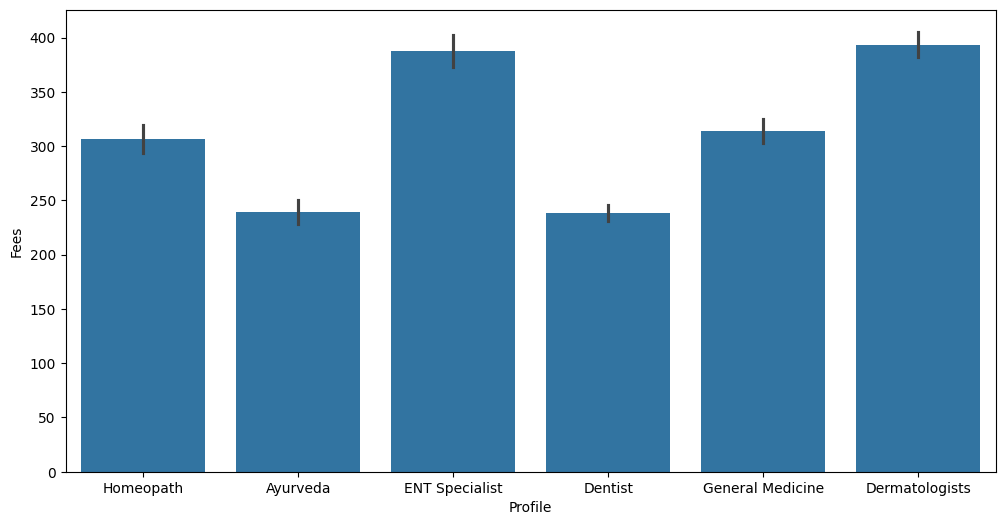

In [52]:
plt.figure(figsize = (12,6))
#palette = sns.color_palette("husl", len(train))

sns.barplot(x = 'Profile', y = 'Fees', data = train)
plt.show()


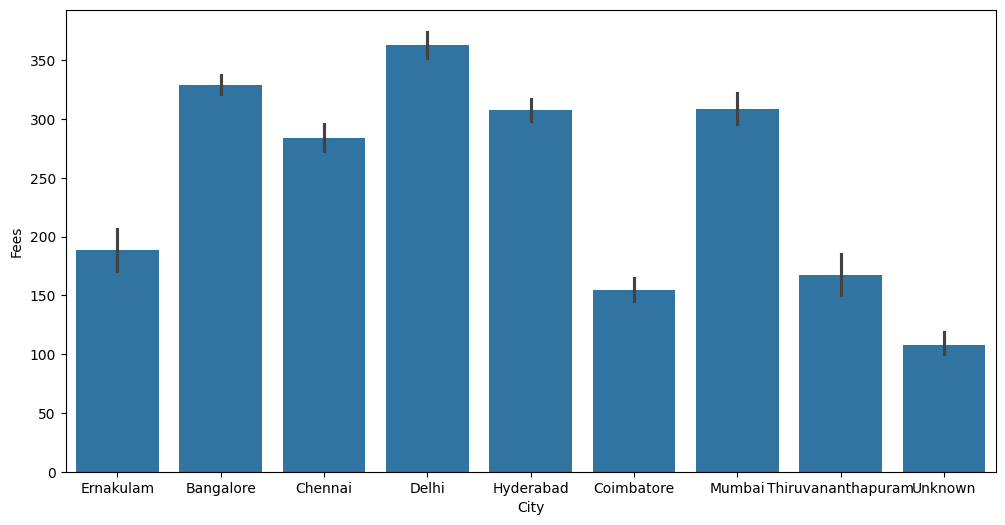

In [53]:
plt.figure(figsize = (12,6))
#palette = sns.color_palette("husl", len(train))

sns.barplot(x = 'City', y = 'Fees', data = train)
plt.show()

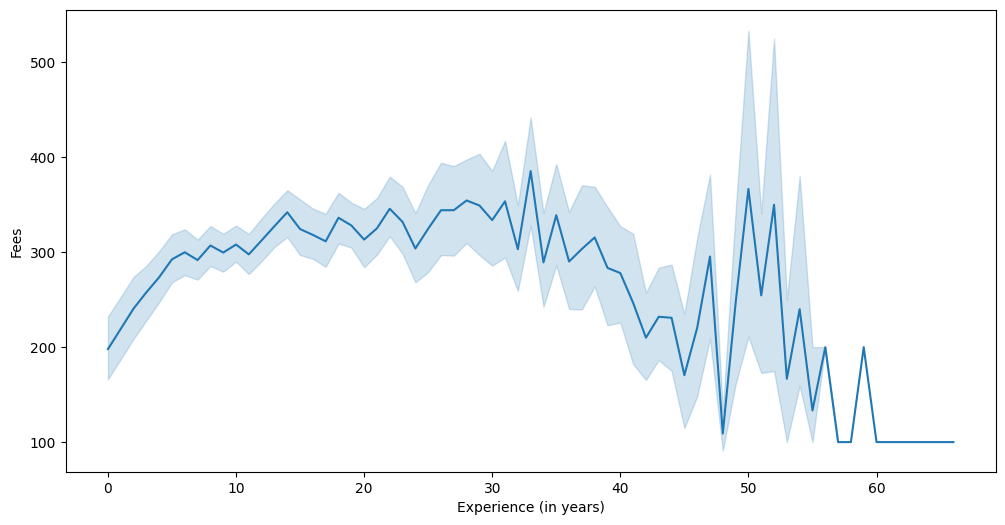

In [54]:
plt.figure(figsize = (12,6))
#palette = sns.color_palette("husl", len(train))

sns.lineplot(x = 'Experience (in years)', y = 'Fees', data = train)
plt.show()

In [55]:
train = pd.get_dummies(train, columns = ['City', 'Profile'], prefix = ['City', 'Profile'])

In [56]:
train.head()

,Experience (in years),Rating,Miscellaneous_Info,Fees,Locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,...,False,False,False,False,True,False,False,False,False,False


In [57]:
train.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)

In [58]:
train.drop(['Locality'], axis = 1, inplace = True)
train.drop(['Miscellaneous_Info'], axis = 1, inplace = True)

In [59]:
train.head()

,Experience (in years),Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,12,10,350,0,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,9,0,300,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,12,0,250,0,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,20,10,250,0,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


## Now do work on Test Data

In [60]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [61]:
# convert cat into numerical 
test['Experience'] = test['Experience'].str.split().str[0]
test['Experience'] = test['Experience'].astype(int)

# Extract city and localityfrom Place columns
test['Place'].fillna('Unknown,Unknown',inplace=True)
test['locality'] = test['Place'].str.split(",").str[0]
test['city'] = test['Place'].str.split(",").str[1]

#drop place column
test.drop('Place',axis=1,inplace=True)

#Rating column
test['Rating'].fillna('-1%',inplace=True)
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)

# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins=bins, labels=labels, include_lowest=True)

C:\Users\hario\AppData\Local\Temp\ipykernel_15972\3855921999.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Place'].fillna('Unknown,Unknown',inplace=True)
C:\Users\hario\AppData\Local\Temp\ipykernel_15972\3855921999.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [62]:
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

#encode the top 10 qualification in test dataset
for title in final_qual:
    test[title] = 0

for x,y in zip(test['Qualification'].values, np.array([i for i in range(len(test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            test[c][y] = 1
            
#drop Qualification after getting top 10 qual.
test.drop('Qualification',axis=1,inplace=True)


#city column
test['city'] = test['city'].apply(lambda x: re.sub(' +','',x))

#encode city and profile
test = pd.get_dummies(test, columns=['city','Profile'], prefix=['city','Profile'])

#drop Miscellaneous_Info and locality
test.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

In [63]:
test.head()


,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,31,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,True,False,False
2,40,7,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,16,10,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [64]:
x = train.drop('Fees', axis = 1)
y = train['Fees']

In [65]:
x

,Experience (in years),Rating,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,MD_General_Medicine,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,12,10,0,0,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,9,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,12,0,0,0,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,20,10,0,0,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,1,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,False
5957,33,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
5958,41,10,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
5959,15,9,1,0,0,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False


In [66]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [69]:
x_train.shape

(4768, 27)

In [70]:
x_test.shape

(1193, 27)

In [71]:
# Model Building
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [72]:
def r_score1(y_pred,y):
    
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = r_score1, greater_is_better=True)

In [73]:
KNN_reg = KNeighborsRegressor()
SVR_reg = SVR()
RAN_reg = RandomForestRegressor()


In [74]:
# train.drop(['Miscellaneous_Info'], axis = 1, inplace = True)

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Experience                            1987 non-null   int32   
 1   Rating                                1987 non-null   category
 2   MBBS                                  1987 non-null   int64   
 3   BDS                                   1987 non-null   int64   
 4   BAMS                                  1987 non-null   int64   
 5   BHMS                                  1987 non-null   int64   
 6   MD - Dermatology                      1987 non-null   int64   
 7   MS - ENT                              1987 non-null   int64   
 8   Venereology & Leprosy                 1987 non-null   int64   
 9   MD - General Medicine                 1987 non-null   int64   
 10  Diploma in Otorhinolaryngology (DLO)  1987 non-null   int64   
 11  MD -

In [76]:
for reg in (KNN_reg, SVR_reg, RAN_reg):
    reg.fit(x_train,y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, r_score1(y_pred,y_test))


KNeighborsRegressor() 0.7827645520901627
SVR() 0.7753298683985804
RandomForestRegressor() 0.7633382254650509


In [77]:
train.head()

,Experience (in years),Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,12,10,350,0,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,9,0,300,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,12,0,250,0,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,20,10,250,0,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
